## 1st pic

The first picture is my kitty, A four-month-old british shorthair boy

width=400, height=300, depth=3


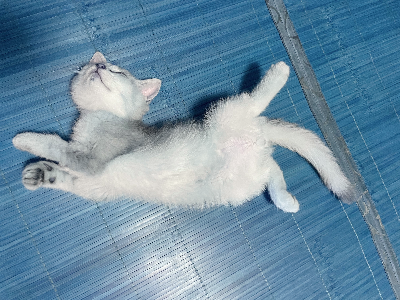

In [9]:
import cv2
import imutils
from PIL import Image
from IPython.display import display

image = cv2.imread("kitty11.jpg")
image = cv2.resize(image, (400, 300))
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))
#cv2.imshow("Image", image)
display(Image.fromarray(image))


#1.	Rotating an image

computing the image center, then constructing the rotation matrix,
and then finally applying the affine warp

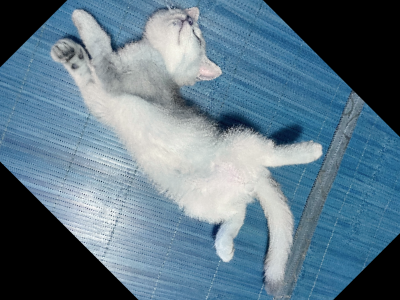

In [10]:
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
display(Image.fromarray(rotated))

2. Smoothing an image

apply a Gaussian blur with a 11x11 kernel to the image to smooth it,
useful when reducing high frequency noise

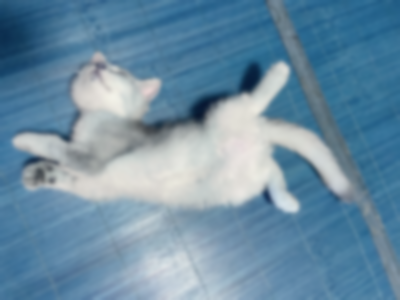

In [11]:
blurred = cv2.GaussianBlur(image, (11, 11), 0)
#cv2.imshow("Blurred", blurred)
display(Image.fromarray(blurred))

## 2nd pic

4.	Converting an image to grayscale

load the input image (whose path was supplied via command line
argument) and display the image to our screen

width=400, height=300, depth=3


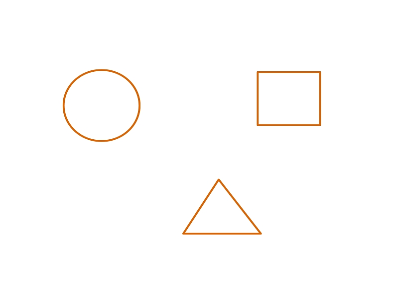

In [12]:
image2 = cv2.imread("items.jpg")
image2 = cv2.resize(image2, (400, 300))
(h, w, d) = image2.shape
print("width={}, height={}, depth={}".format(w, h, d))
#cv2.imshow("Image", image)
display(Image.fromarray(image2))

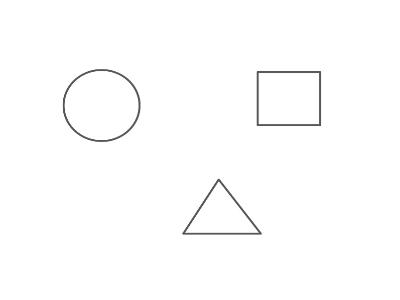

In [13]:
# convert the image to grayscale
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
#cv2.imshow("Gray", gray)
display(Image.fromarray(gray))

5.	Edge detection

applying edge detection we can find the outlines of objects in images

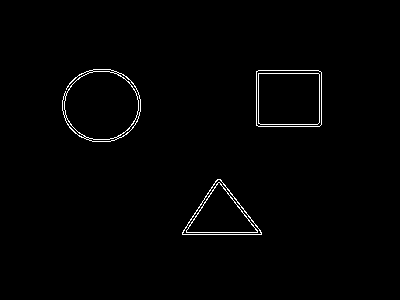

In [14]:
edged = cv2.Canny(gray, 30, 150)
#cv2.imshow("Edged", edged)
display(Image.fromarray(edged))

#6.	Detecting and Drawing Contours

First threshold the image by setting all pixel values less than 225 to 255 (white; foreground) and all pixel values >= 225 to 255 (black; background), thereby segmenting the image

Then find contours (i.e., outlines) of the foreground objects in the thresholded image

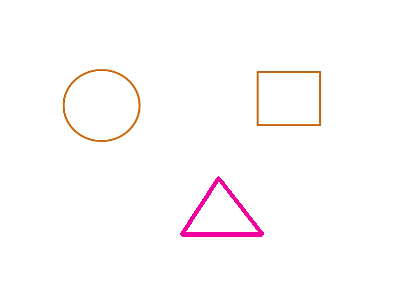

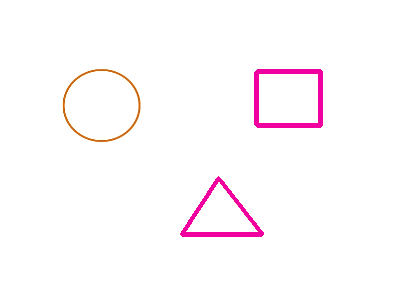

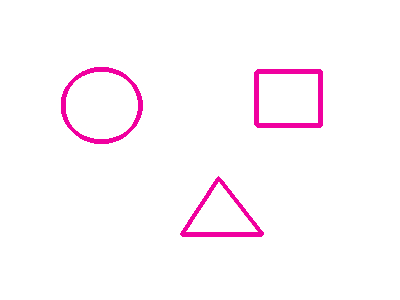

In [15]:

thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
#cv2.imshow("Thresh", thresh)

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image2.copy()
# loop over the contours
for c in cnts:
	cv2.drawContours(output, [c], -1, (240, 0, 159), 3)
	#cv2.imshow("Contours", output)
	#cv2.waitKey(0)
	display(Image.fromarray(output))

3.	Counting objects

1. Convert the picture to gray
2. Binarization
3. Corrosion change
4. Distance transformation
5. Binarization and open operation
6. Look for contours
7. Calculation

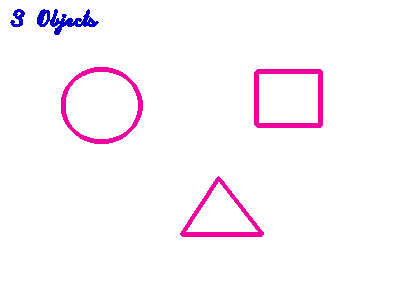

In [16]:
text = "{} Objects".format(len(cnts))
cv2.putText(output,text,(10,25),cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 0.7,(0,0,200),2)
#cv2.imshow("Contours", output)
display(Image.fromarray(output))